#### Elastic Net
This is a kind of half-way house between Ridge Regression and Lasso Regression (Least Absolute Shrink & Selection operator regression).
In which the Regularization term is a mix of Ridge and Lasso regularization terms, with some control voer the mix ratio 'r'.
* $ r == 0$ Elastic net is effectively Ridge Regression
* $ r == 1$ Elastic net is effectively Lasso Regression

Noted as 
$$ (\theta) = MSE(\theta) + {r\alpha} {\sum^n_{i=1}} {\bigr| \theta_i\bigr|} + {{1-r}\over 2}\alpha {\sum^n_{i=1}} \theta^2_i $$

#### Which to use, Linear Regression, Ridge Regression, Lasso or Elastic Net:
Avoid using plain linear regression. 
* Good default is Ridge Regression
* Use Lasso or Elastic Net where the number of useful features are less. Remember these reduce weights of features that are not useful to zero.
* Where feature numbers is greater than training instances - Use Elastic Net. (Lasso will be erratic in such a scenario).



#### Early Stopping
A way of regularizing learning algorithms like Gradient Descent.

Where training is stopped as soon as the validation error reaches a minimum.
Example:
Say we are training a model with Batch Gradient Descent. As learning over epochs occurs.
The prediction error (RMSE in this case) on the training set will expectedly go down and so does the prediction on the validation set.
However, after a while the validation error stops decreasing and at some point starts increasing. Indication the model is overfitting the training data. At this point we stop training.

#### This is a very efficient and simple regularization technique.

In [1]:
import numpy as np
import os


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# standardize notebook result over diff runs
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
# data setup
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
polynomial_scaler = Pipeline((
('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
))

In [9]:
from sklearn.linear_model import SGDRegressor
X_train_pscaled = polynomial_scaler.fit_transform(X_train)
X_val_pscaled = polynomial_scaler.transform(X_val)

sgd_regressor = SGDRegressor(n_iter=1, penalty=None, eta0=0.0005,warm_start=True, learning_rate='constant', random_state=42)
epochs = 500

training_errors, validation_errors = [],[]

for epoch in range(epochs):
    sgd_regressor.fit(X_train_pscaled, y_train)
    y_train_predict = sgd_regressor.predict(X_train_pscaled)
    y_validation_predict = sgd_regressor.predict(X_val_pscaled)
    training_errors.append(mean_squared_error(y_train_predict, y_train))
    validation_errors.append(mean_squared_error(y_validation_predict, y_val))
    
best_epoch = np.argmin(validation_errors)
best_val_rmse = np.sqrt(validation_errors[best_epoch])



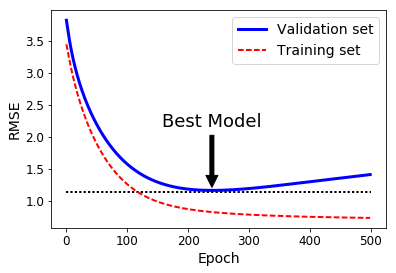

In [16]:
plt.annotate("Best Model", xy=(best_epoch, best_val_rmse), 
               xytext=(best_epoch, best_val_rmse + 1),
              ha='center',
              arrowprops=dict(facecolor='black', shrink=0.05),
              fontsize=18)

best_val_rmse -= 0.03 # mock around to beautify chart
plt.plot([0, epochs], [best_val_rmse, best_val_rmse], 'k:', linewidth=2)
plt.plot(np.sqrt(validation_errors), 'b-', linewidth=3, label='Validation set')
plt.plot(np.sqrt(training_errors), 'r--', linewidth=2, label='Training set')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.show()
